In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

dataset=pd.read_csv('loans.csv')
print(dataset)
dataset.head()
dataset.tail()
x= dataset.iloc[:,:-1].values
y= dataset.iloc[:,3].values
print()
print(x)
print()
print(y)
print()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:,[1,2]])
x[:,1:3]= imputer.transform(x[:,1:3])
print(x)
print()
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
x[:,0] = labelencoder_x.fit_transform(x[:,0])
print(x)
print()
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
x[:,0] = labelencoder_x.fit_transform(x[:,0])
onehotencoder = OneHotEncoder(categorical_features=[0])
x= onehotencoder.fit_transform(x).toarray()
print(x)
print()
#dependent variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)







           City   Age    Salary Approved
0  Apple Valley  25.0   65000.0      Yes
1     Maplewood  30.0   81000.0       No
2         Eagan  33.0       NaN      Yes
3  Apple Valley  39.0  100000.0       No
4     Maplewood  28.0   91000.0      Yes
5         Eagan   NaN   66000.0       No
6  Apple Valley  40.0   98000.0      Yes
7     Maplewood  34.0   86000.0      Yes
8         Eagan  25.0   70000.0       No
9     Maplewood  24.0   62000.0      Yes

[['Apple Valley' 25.0 65000.0]
 ['Maplewood' 30.0 81000.0]
 ['Eagan' 33.0 nan]
 ['Apple Valley' 39.0 100000.0]
 ['Maplewood' 28.0 91000.0]
 ['Eagan' nan 66000.0]
 ['Apple Valley' 40.0 98000.0]
 ['Maplewood' 34.0 86000.0]
 ['Eagan' 25.0 70000.0]
 ['Maplewood' 24.0 62000.0]]

['Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes']

[['Apple Valley' 25.0 65000.0]
 ['Maplewood' 30.0 81000.0]
 ['Eagan' 33.0 79888.88888888889]
 ['Apple Valley' 39.0 100000.0]
 ['Maplewood' 28.0 91000.0]
 ['Eagan' 30.88888888888889 66000.0]
 ['Apple Valley' 40.0 98

C:\Users\sahithi katuri\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\sahithi katuri\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [18]:
print(y)

[1 0 1 0 1 0 1 1 0 1]


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)
print(x_train)
print()
print(y_train)
print()
print(x_test)
print()
print(y_test)

[[0.00000000e+00 1.00000000e+00 0.00000000e+00 3.30000000e+01
  7.98888889e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 2.40000000e+01
  6.20000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 4.00000000e+01
  9.80000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 3.08888889e+01
  6.60000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.90000000e+01
  1.00000000e+05]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 2.50000000e+01
  6.50000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 2.50000000e+01
  7.00000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 2.80000000e+01
  9.10000000e+04]]

[1 1 1 0 0 1 0 1]

[[0.0e+00 0.0e+00 1.0e+00 3.4e+01 8.6e+04]
 [0.0e+00 0.0e+00 1.0e+00 3.0e+01 8.1e+04]]

[1 0]


In [21]:
dataset = pd.read_csv('gm.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
from sklearn.linear_model import LinearRegression
lrObj = LinearRegression()
lrObj.fit(X_train, y_train)
y_pred = lrObj.predict(X_test)
print(y_test)
print(y_pred)

[15.2 14.6 16.9 13.5 17.  13.1 16.4]
[15.43531025 14.77320595 17.32703684 13.54358367 17.42162317 13.07065202
 16.75951886]


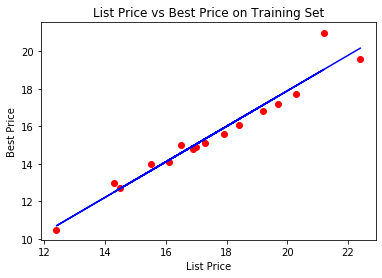

In [22]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train, lrObj.predict(X_train), color='blue')
plt.title('List Price vs Best Price on Training Set')
plt.xlabel('List Price')
plt.ylabel('Best Price')
plt.show()

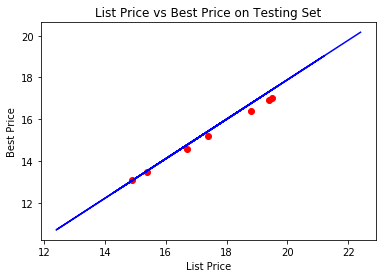

In [23]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train, lrObj.predict(X_train), color='blue')
plt.title('List Price vs Best Price on Testing Set')
plt.xlabel('List Price')
plt.ylabel('Best Price')
plt.show()